In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl #IT COMBINES NUMPY WITH PYPLOT I.E. mathematics(sin,cos,,).. + pyplot functionality
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('D:\datasets\FuelConsumptionCo2.csv')

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
#summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
#let`s select features
fa=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
fa.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


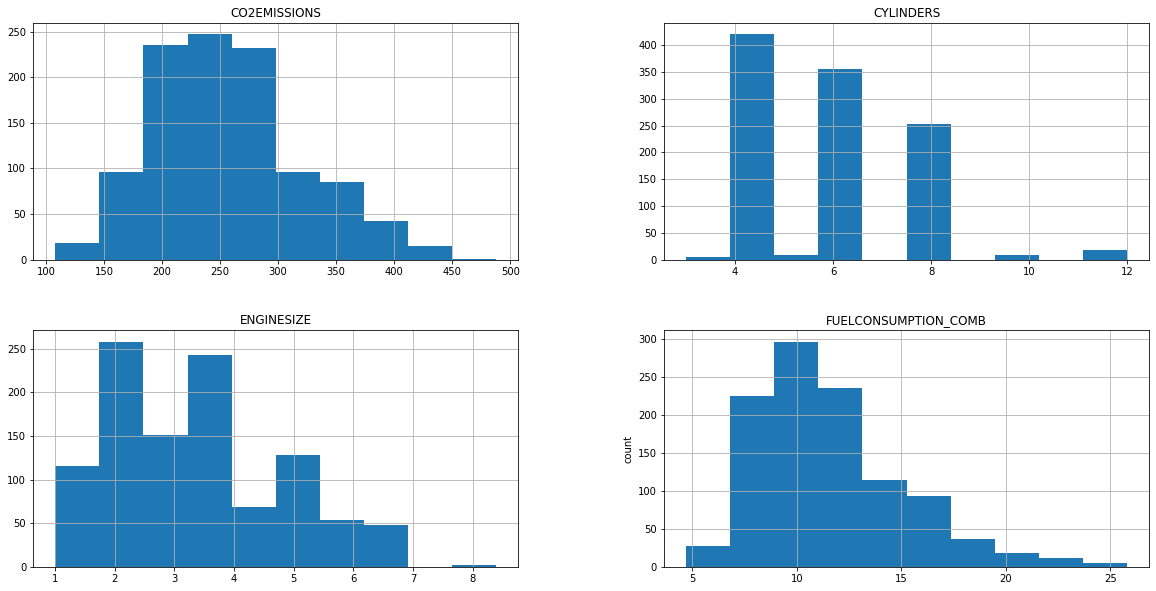

In [7]:
fa.hist(figsize=(20,10))
plt.ylabel('count')
plt.show()

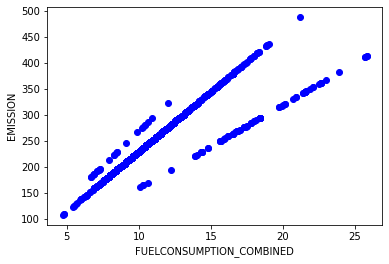

In [8]:
plt.scatter(fa.FUELCONSUMPTION_COMB,fa.CO2EMISSIONS,color='blue')
plt.xlabel('FUELCONSUMPTION_COMBINED')
plt.ylabel("EMISSION")
plt.show()

Text(0, 0.5, 'CO2EMISSIONS')

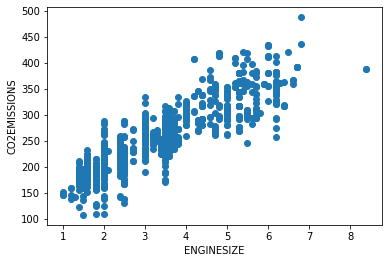

In [9]:
plt.scatter(fa.ENGINESIZE,fa.CO2EMISSIONS)#nocolor
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

Text(0, 0.5, 'CO2EMISSIONS')

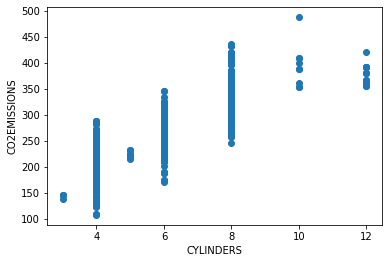

In [10]:
plt.scatter(fa.CYLINDERS,fa.CO2EMISSIONS)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')


In [11]:
#train-test split using np.random.rand() function
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk] #~ implies without

## TRAIN-TEST DISTRBUTION


Text(0, 0.5, 'EMISSIONS')

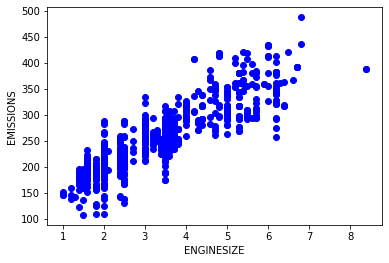

In [12]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('EMISSIONS')

## modeling


In [13]:
from sklearn import linear_model
mod=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
mod.fit(train_x,train_y)
print('Coefficients:',mod.coef_) #parameters of the line of linear regression
print('Intercepts:',mod.intercept_)

Coefficients: [[39.49837904]]
Intercepts: [124.15737291]


Text(0, 0.5, 'EMISSION')

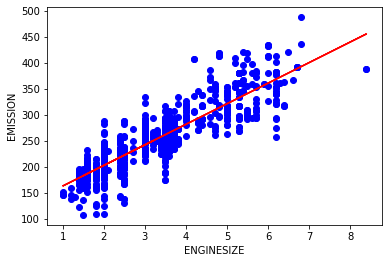

In [14]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_x,mod.coef_*train_x+mod.intercept_,'r') #r stands for color.ALSO NOTE this is the formula y=mx+c
plt.xlabel('ENGINESIZE')
plt.ylabel('EMISSION')

In [16]:
from sklearn.metrics import r2_score
#R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat=mod.predict(test_x)
print('Mean absolute error:%.2f'%np.mean(np.absolute(test_y_hat - test_y)))#2f are called as format specifiers, they begin with % followed by character that represents the data type. For e.g %d format specifier is a placeholder for a integer, similarly %. 2f is a placeholder for floating point number. 
print('Residual sum of squares(MSE):%.2f'%np.mean((test_y_hat -test_y))**2) #note in calculation mean will be calculated at last.
print('R2-score:%.2f'%r2_score(test_y_hat,test_y))

Mean absolute error:22.44
Residual sum of squares(MSE):0.25
R2-score:0.75
